In [1]:
# Import required packages

import networkx as nx
import random
#%pip install gensim
from gensim.models import Word2Vec
import numpy as np
import matplotlib.pyplot as plt
import time

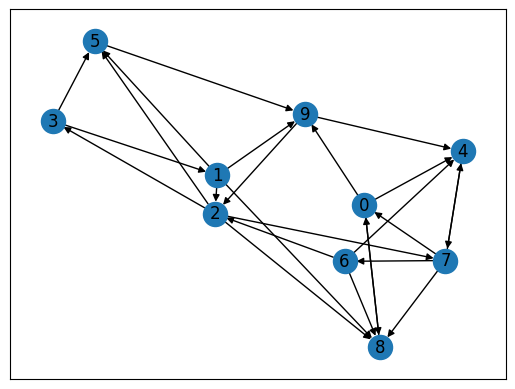

In [11]:
# Create and draw graph

n = 10
p = 0.25

G = nx.erdos_renyi_graph(n, p, directed = True)

# outdated version
# nx.draw(G, with_labels = True)

nx.draw_networkx(G, with_labels = True)
plt.show()

In [12]:
# perform random walks in graph

def random_walk(graph:nx.Graph, start_node:int = 0, walk_length:int = 1) -> list[int]:

    sequence = [str(start_node)]

    for _ in range(walk_length):
        neighbours = [neighbour for neighbour in graph.neighbors(start_node)]
        if neighbours == []:
          return sequence
        selected_neighbour = random.choice(neighbours)
        sequence.append(str(selected_neighbour))
        start_node = selected_neighbour

    return sequence

# example of random walks in graph
for _ in range(5):
    print(random_walk(G, random.randrange(n), 10))

['0', '8', '0', '4', '7', '0', '9', '4', '7', '4', '7']
['0', '8', '0', '4', '7', '8', '0', '4', '7', '0', '4']
['5', '9', '4', '7', '8', '0', '9', '4', '7', '4', '7']
['9', '2', '8', '0', '8', '0', '8', '0', '9', '4', '7']
['2', '8', '0', '8', '0', '8', '0', '8', '0', '9', '2']


In [13]:
# create walks for Word2Vec

amount_walks = 200
length_per_walk = 20
dimension = 2

walks = []

for _ in range(amount_walks):
  walks.append(random_walk(G, random.randrange(n), length_per_walk))


# Train Word2Vec model, play around with Word2Vec hyperparameters

model = Word2Vec(walks, vector_size = dimension, window = 2, sg = 1, min_count = 1)
model.train(walks, total_examples = model.corpus_count, epochs = 30, report_delay = 1)


(13163, 126000)

In [14]:
# show results of node embedding

for node in range(n):
  print(f"Node {node:2d}: {model.wv.get_vector(node)}")

Node  0: [-0.51016027  1.0392894 ]
Node  1: [-0.39759478  1.2251953 ]
Node  2: [-0.54177725  1.0091997 ]
Node  3: [-0.31251252  1.3158566 ]
Node  4: [-1.0487698   0.46179122]
Node  5: [-1.0099857   0.54439515]
Node  6: [-0.69707644  0.8028963 ]
Node  7: [-1.2770973   0.25161076]
Node  8: [-1.0447998  0.5800153]
Node  9: [-1.4523854   0.09811769]


In [6]:
"""
# compare to DeepWalk implementation from Karateclub

karate_model = DeepWalk(walk_length = length_per_walk, dimensions = dimension, window_size = 2)
karate_model.fit(G)
karate_embedding = karate_model.get_embedding()

for node in range(n):
  print(f"Node {node:2d}: {karate_embedding[node]}")
  """

'\n# compare to DeepWalk implementation from Karateclub\n\nkarate_model = DeepWalk(walk_length = length_per_walk, dimensions = dimension, window_size = 2)\nkarate_model.fit(G)\nkarate_embedding = karate_model.get_embedding()\n\nfor node in range(n):\n  print(f"Node {node:2d}: {karate_embedding[node]}")\n  '

In [15]:
# testing for similarity of nodes

input_number = 0

while input_number != -1:
  input_number = int(input("Similarity to which node would you like to check (enter -1 to exit): "))
  if input_number != -1:
    for node_details in model.wv.most_similar(positive = [input_number]):
      print(node_details)
    print()
    time.sleep(5)

Similarity to which node would you like to check (enter -1 to exit): 5
('3', 0.9999229907989502)
('9', 0.9968338012695312)
('5', 0.9553830623626709)
('6', 0.9353812336921692)
('1', 0.9102475047111511)
('4', 0.8344041109085083)
('0', 0.8138160109519958)
('7', 0.7230187058448792)
('8', 0.6650388836860657)

Similarity to which node would you like to check (enter -1 to exit): -1
